# Lab 8: Decision Trees

In [81]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.tree import tree, export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

sns.set_style('whitegrid')
%matplotlib inline

## 8.3.1 Fitting Classification Trees

In [22]:
# import data
carseats = pd.read_csv('./datasets/Carseats.csv').drop('Unnamed: 0', axis=1)
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [23]:
# create new feature
carseats['High'] = carseats['Sales'].map(lambda x: 1 if x>8 else 0)
carseats = pd.get_dummies(carseats, columns=['ShelveLoc', 'Urban', 'US'])
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,High,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,1,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,1,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,0,1,0,0,0,1,1,0


In [63]:
clf = DecisionTreeClassifier(min_samples_split=15)

# predictors
predictors = carseats.columns.difference(['Sales','High'])
X = carseats[predictors]
y = carseats['High'].values.reshape(-1,1)

# fit tree
tree_est = clf.fit(X,y)

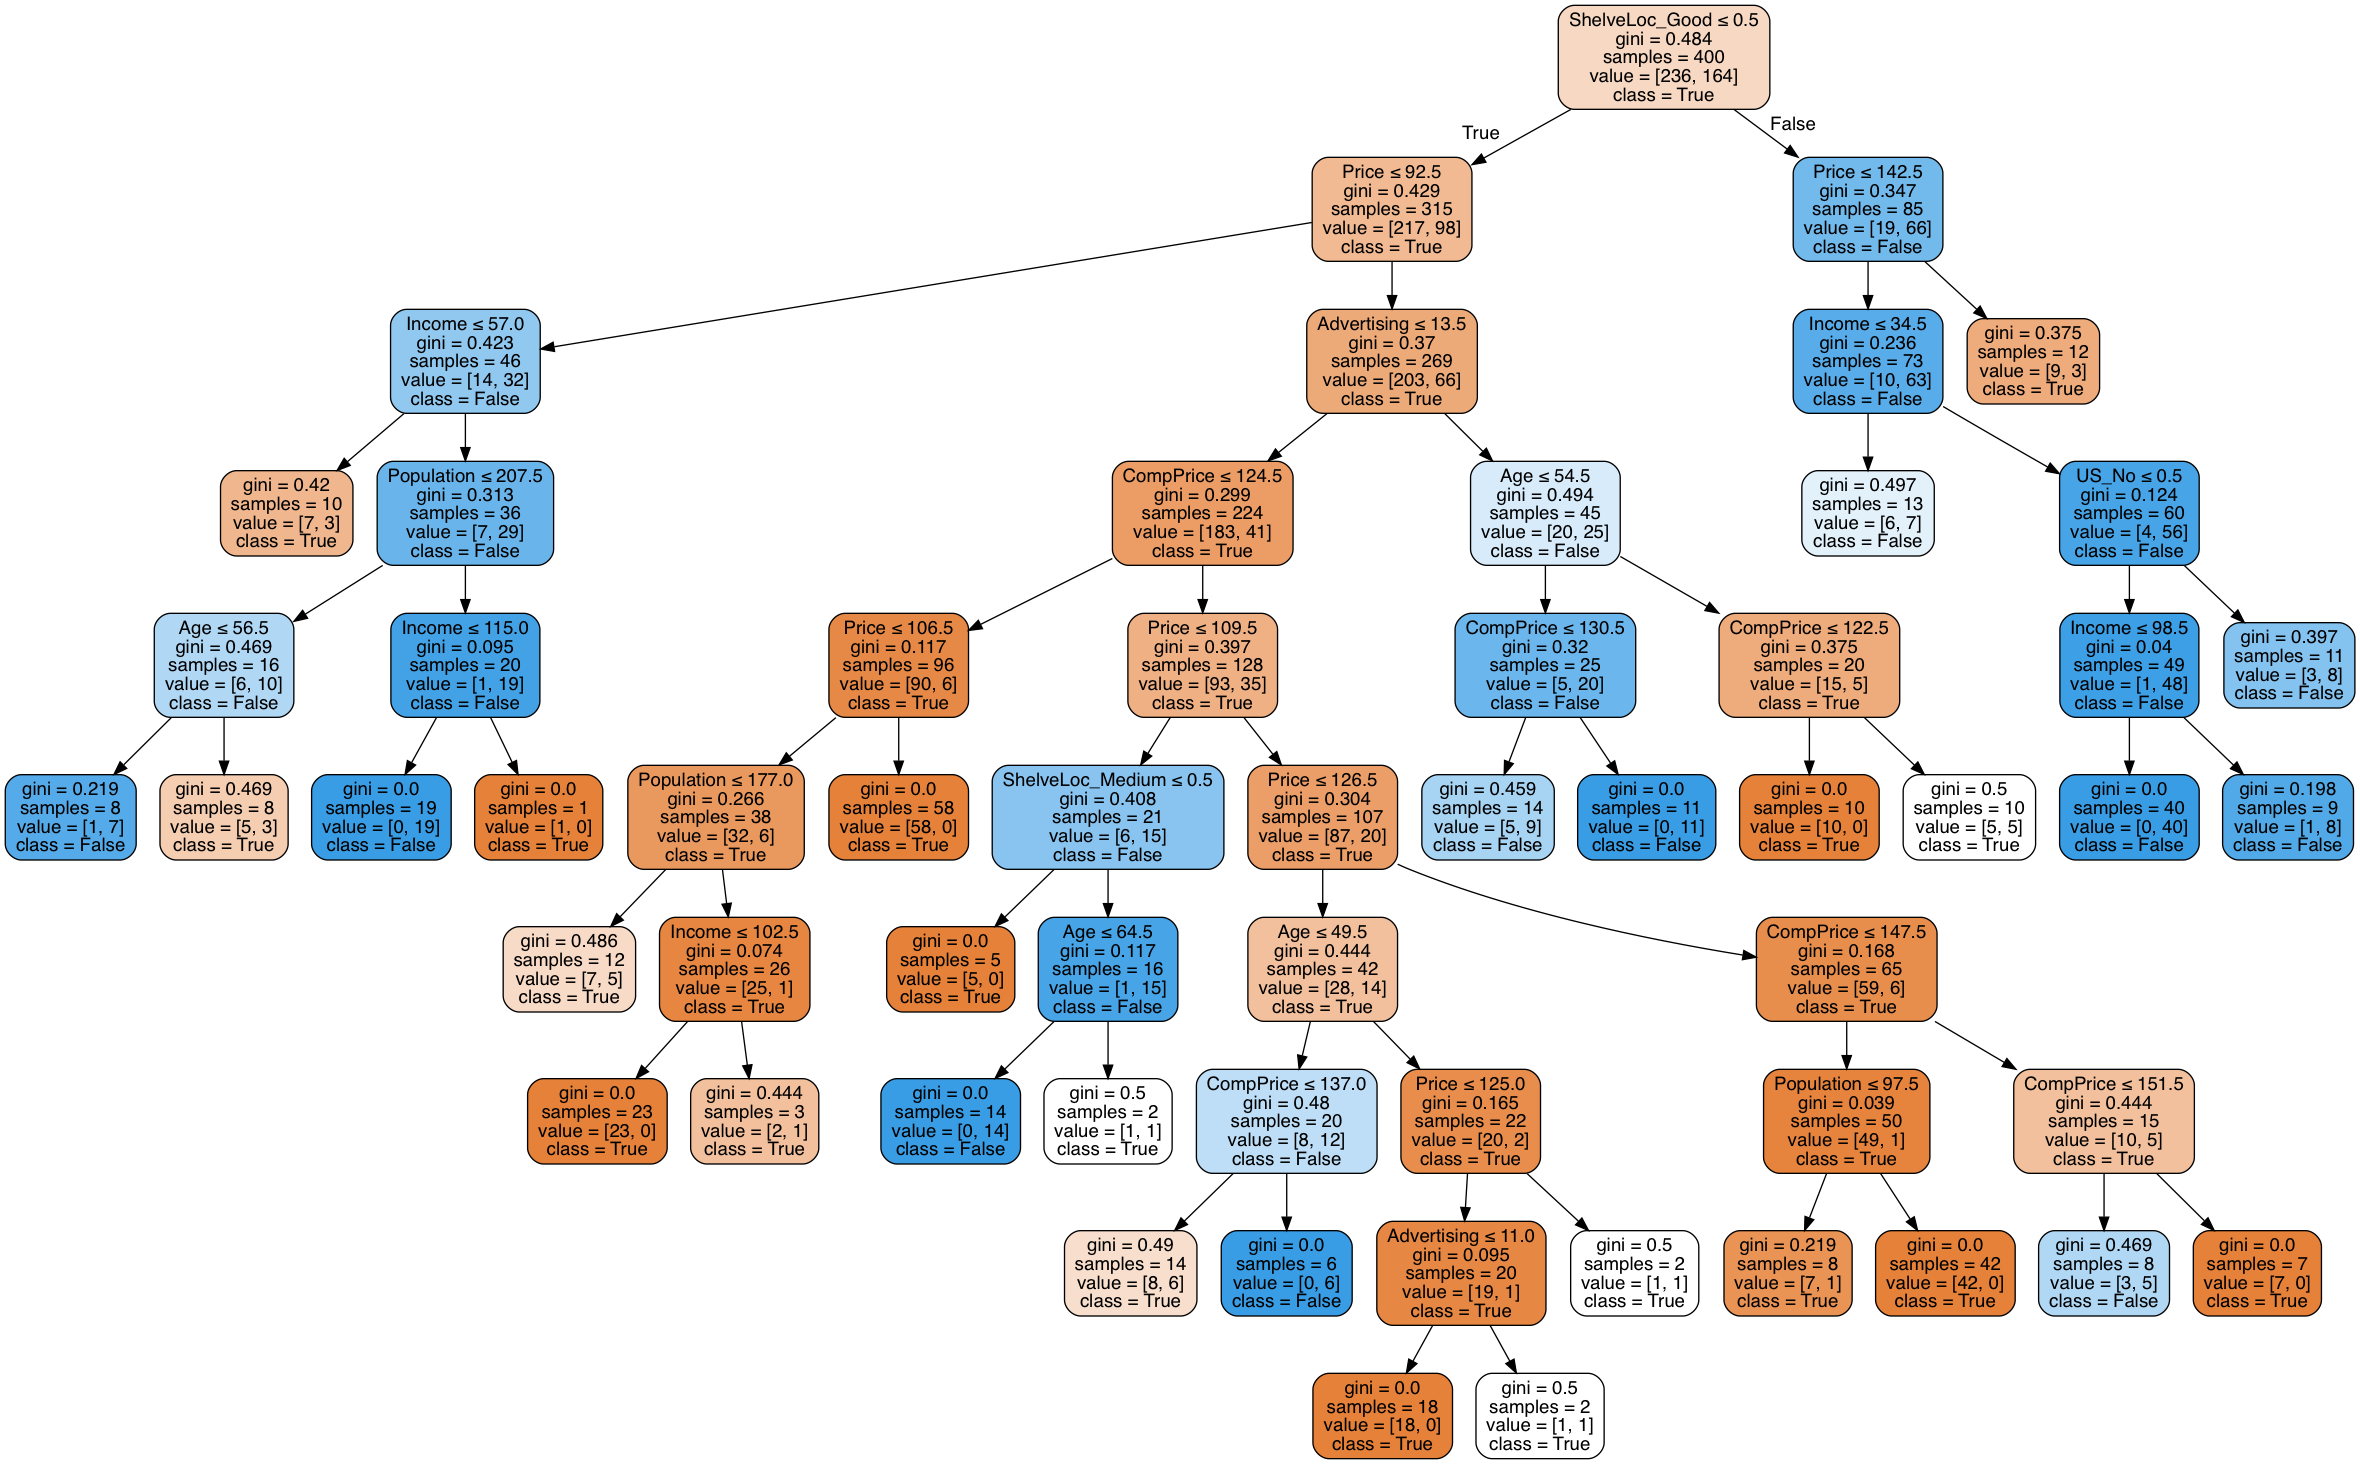

In [64]:
# plot the tree
dot_data = export_graphviz(tree_est, out_file='seat_tree.dot',feature_names=predictors,
                          class_names=['True','False'],filled=True,rounded=True,
                          special_characters=True)

with open('seat_tree.dot') as f:
    dot_graph = f.read()
    
I = graphviz.Source(dot_graph,format='png', engine='dot')
Image(I.render())

In [50]:
I.view()

'Source.gv.png'

In [65]:
# inspect feature importances
feature_importances = tree_est.feature_importances_
pd.DataFrame(data=feature_importances,index=predictors,columns=['Importance']).sort_values(by=['Importance'],ascending=False)

,Importance
Price,0.288377
ShelveLoc_Good,0.218371
CompPrice,0.127129
Age,0.113189
Advertising,0.085114
Income,0.075349
ShelveLoc_Medium,0.050438
Population,0.033417
US_No,0.008616
Education,0.000000


In [66]:
# compute the training error
cmatrix = confusion_matrix(y_true = y, y_pred=tree_est.predict(X), labels=[True, False])
print(cmatrix)

[[134  30]
 [ 19 217]]


In [67]:
error_rate = (cmatrix[0,1]+cmatrix[1,0])/cmatrix.sum()
print("Training Error Rate:", error_rate)

Training Error Rate: 0.1225


In [68]:
# model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [69]:
# Train the model
tree_est = clf.fit(X_train, y_train)
# make predictions 
ypred = tree_est.predict(X_test)

cmatrix_test = confusion_matrix(y_true = y_test, y_pred=ypred, labels=[True, False])
error_rate = (cmatrix_test[0,1]+cmatrix_test[1,0])/cmatrix_test.sum()
print("Test Error Rate:", error_rate)

Test Error Rate: 0.30303030303030304


## 8.3.2 Fitting Regression Trees

In [71]:
# import data
boston = pd.read_csv('./datasets/Boston.csv')
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [72]:
# Extract predictors and target
X = boston.drop('medv',axis=1)
y = boston['medv']

In [73]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
# crete tree (pruning is not supported by Sklearn)
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

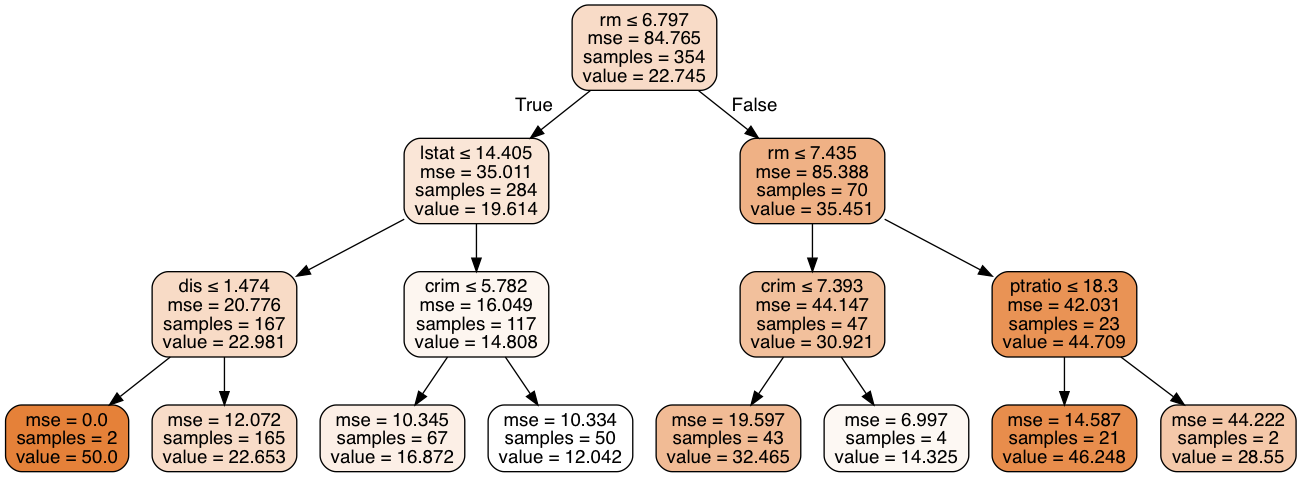

In [76]:
# plot the tree
dot_data = export_graphviz(tree_reg, out_file='boston_tree.dot',feature_names=X_train.columns,
                           filled=True,rounded=True,
                           special_characters=True)

with open('boston_tree.dot') as f:
    dot_graph = f.read()
    
I = graphviz.Source(dot_graph,format='png', engine='dot')
Image(I.render())

28.069857549754044

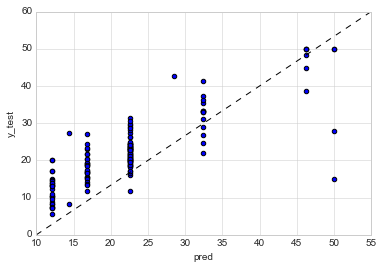

In [79]:
pred = tree_reg.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

## 8.3.3 Bagging and Random Forest

In [83]:
# bagging = random forest with all the features
bag = RandomForestRegressor(max_features=len(X_train.columns),random_state=0)
bag.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

20.510911184210528

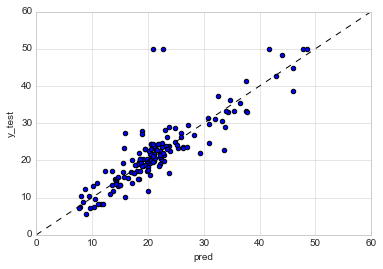

In [84]:
pred = bag.predict(X_test)
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)

There is a significan improvement of the predictions between the single tree and the bagging.

In [86]:
# random forest
rf = RandomForestRegressor(max_features=6,random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

16.43626447368421

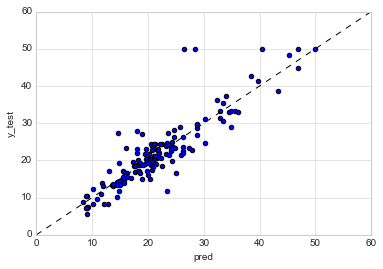

In [87]:
pred = rf.predict(X_test)
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)

The MSE test is even lower when using Random Forest.

In [89]:
# inspect feature importances
feature_importances = rf.feature_importances_
pd.DataFrame(data=feature_importances,index=X_train.columns,columns=['Importance']).sort_values(by=['Importance'],ascending=False)

,Importance
lstat,0.323367
rm,0.303752
ptratio,0.116455
indus,0.094710
dis,0.059854
nox,0.023039
crim,0.019851
tax,0.018943
age,0.016410
black,0.013044


## 8.3.4 Boosting

In [90]:
regr = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, max_depth=4, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5000, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [91]:
# inspect feature importances
feature_importances = regr.feature_importances_
pd.DataFrame(data=feature_importances,index=X_train.columns,columns=['Importance']).sort_values(by=['Importance'],ascending=False)

,Importance
rm,0.171951
age,0.167242
lstat,0.145754
crim,0.130371
dis,0.107267
black,0.104238
nox,0.054626
ptratio,0.029015
tax,0.028611
indus,0.028602


In [93]:
mean_squared_error(y_test, regr.predict(X_test))

13.595851881322767

Gradient boosting performs better than the Random Forest model.

In [95]:
regr2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=4, random_state=1)
regr2.fit(X_train, y_train)
mean_squared_error(y_test, regr2.predict(X_test))

12.806255432224017